Loading libraries and setting up the environment

In [3]:
import sympy
sympy.init_printing()

# Newtonian Case

Equation of motion

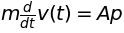

In [4]:
m = sympy.Symbol('m', positive=True) # Mass of the bullet
v = sympy.Symbol('v', positive=True) # Velocity
t = sympy.Symbol('t', positive=True) # Time
A = sympy.Symbol('A', positive=True) # Bullet cross section
p = sympy.Symbol('p') # Pressure
eqn_of_motion = sympy.Eq(v(t).diff(t)*m,A*p)
eqn_of_motion

Conservation of the Riemann invariant

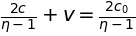

In [5]:
c_0 = sympy.Symbol('c_0', positive=True) # Initial speed of sound
c = sympy.Symbol('c', positive=True) # Speed of sound
eta = sympy.Symbol('eta', positive=True) # Adiabatic index (I'm not using gamma to avoid confusion with the Lorentz factor)
riemann_invariant_conservation = sympy.Eq(v+2*c/(eta-1),2*c_0/(eta-1))
riemann_invariant_conservation

Isentropic relation

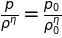

In [6]:
rho = sympy.Symbol('rho') # Density
rho_0 = sympy.Symbol('rho_0', positive=True) # Initial density
p_0 = sympy.Symbol('p_0', positive=True) # Initial pressure
entropy_conservation = sympy.Eq(p/rho**eta,p_0/rho_0**eta)
entropy_conservation

It will be more useful to relate the pressure to the speed of sound

In [7]:
temp = entropy_conservation
temp = temp.subs(rho, eta*p/c**2)
temp = temp.subs(rho_0, eta*p_0/c_0**2)
temp = sympy.expand_power_base(temp,force=True).simplify()
entropy_p_vs_c = temp
entropy_p_vs_c

Pressure as a function of velocity

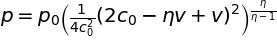

In [8]:
temp = entropy_conservation
temp = temp.subs(rho,eta*p/c**2)
temp = temp.subs(rho_0,eta*p_0/c_0**2)
temp = temp.subs(sympy.solve(riemann_invariant_conservation,c,dict=True)[0])
temp = sympy.expand_power_base(temp,force=True)
temp = sympy.solve(temp,p)[0]
temp = sympy.expand_power_base(temp, force=True).simplify()
p_vs_v = temp
sympy.Eq(p,p_vs_v)

Terminal velocity

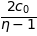

In [9]:
temp = riemann_invariant_conservation
temp = sympy.solve(temp.subs(c,0),v)[0]
terminal_velocity = temp
terminal_velocity

Solving the equation of motion

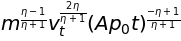

In [10]:
y = sympy.Symbol('y', positive=True)
v_t = sympy.Symbol('v_t', positive=True)
temp = eqn_of_motion
temp = temp.subs(p, p_vs_v.subs(v,terminal_velocity*(1-y)))
temp = temp.subs(v(t), -terminal_velocity*(1-y(t)))
temp = temp.doit()
temp = sympy.expand_power_base(temp, force=True)
temp = temp.simplify()
temp = temp.subs(y(t).diff(t),y/t)
temp = sympy.solve(temp,y)[0]
temp = (temp*terminal_velocity).subs(c_0,v_t*(eta-1)/2)
temp = sympy.expand_power_base(temp,force=True).simplify()
asymptotic_velocity = temp
asymptotic_velocity

The thickness of the bullet (size along the direction of motion) increases with time according to

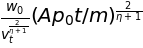

In [11]:
w_0 = sympy.Symbol('w_0', positive=True) # Initial thickness
temp = w_0*(p/p_0)**(-1/eta)
temp = temp.subs(sympy.solve(entropy_p_vs_c,p,dict=True)[0])
temp = temp.subs(c_0, v_t)
temp = temp.subs(c, asymptotic_velocity)
temp = sympy.expand_power_base(temp).simplify()
thickness_history = temp
thickness_history

Time when the bullet is broken apart by the Rayleigh Taylor instability

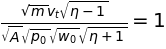

In [12]:
w = sympy.Symbol('w', positive=True) # Current thickness of the bullet
a = sympy.Symbol('a', positive=True) # Acceleration
temp = sympy.Eq(t*sympy.sqrt(a/w),1)
temp = temp.subs(a,-asymptotic_velocity.diff(t)).simplify()
temp = temp.subs(w, thickness_history)
sympy.expand_power_base(temp).simplify()

We have two timescales in this problem: the sound crossing time of the bullet $w_0/v_t$, and the acceleration time $m v_t/A p_0$. If the acceleration time is larger than the sound crossing time, then the bullet disintegrates right at the beginning. If not, then it never will.

# Relativistic Case

Equation of motion

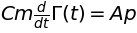

In [13]:
gamma = sympy.Symbol('gamma', positive=True) # Lorentz factor
C = sympy.Symbol('C', positive=True) # Speed of light
ur_eqn_of_motion = sympy.Eq(C*m*gamma(t).diff(t), A*p)
ur_eqn_of_motion

Conservation of the relativistic Riemann invariant

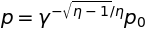

In [14]:
ur_riemann_invariant_conservation = sympy.Eq(p,p_0*gamma**(-sympy.sqrt(eta-1)/eta))
ur_riemann_invariant_conservation

Solving the equation of motion

In [15]:
temp = ur_eqn_of_motion.subs(p,ur_riemann_invariant_conservation.rhs)
temp = temp.subs(gamma(t).diff(t),gamma/t)
lf_history = sympy.solve(temp,gamma)[0]
lf_history

Pressure history

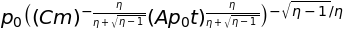

In [16]:
temp = ur_riemann_invariant_conservation.rhs
ur_pressure_history = temp.subs(gamma, lf_history).simplify()
ur_pressure_history

Density history

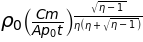

In [17]:
eta2 = sympy.Symbol('eta2', positive=True)
temp = rho_0*(p/p_0)**(1/eta)
temp = temp.subs(p,ur_pressure_history)
temp = temp.subs(eta,eta2+1)
ur_density_history = sympy.expand_power_base(temp,force=True).simplify().subs(eta2, eta-1)
ur_density_history

Now, let us turn our attention to the Riemann problem. On the left (negative) side, there's a photon gas with pressure $p_l$. On the right, there's a cold baryonic matter with mass density $\rho_r$. Both fluids are stationary. In the case where $p_l/\rho_r \ll c^2$, then the first shock is non relativistic, and what we get is basically the non relativistic problem, boosted to a relativistic velocity. If, on the other hand $p_l/\rho_r \gg c^2$, then the first shock is relativistic. We call the second case the genuinely relativistic case.

## Boosted Newtonian Case

Thickness of the bullet in the fluid frame

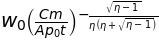

In [18]:
temp = w_0*rho_0/rho
temp = temp.subs(rho, ur_density_history)
ff_bullet_thickness = temp
ff_bullet_thickness

Breakup time

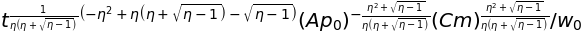

In [19]:
temp = (t/gamma)**2*a/ff_bullet_thickness
temp = temp.subs(gamma, lf_history)
temp = temp.subs(a, lf_history/t)
temp = temp.subs(eta, eta2+1)
temp = sympy.expand_power_base(temp, force=True).simplify().subs(eta2, eta-1).simplify()
tentative_growth_factor=temp
tentative_growth_factor

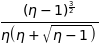

In [20]:
t*sympy.log(tentative_growth_factor).diff(t).simplify()

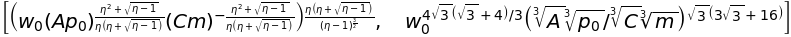

In [21]:
bn_t_breakup = sympy.solve(tentative_growth_factor-1,t)[0]
[bn_t_breakup,
 sympy.expand_power_base(bn_t_breakup, force=True).simplify().subs(eta,sympy.Rational(4,3)).simplify()]

## Genuinely Relativistic Case

In this case the initial pressure in the bullet will be different from the initial pressure in the barrel. To determine this pressre, we need to find the intersection between the relative Hugoniot (Taub) curve of the bullet and the rarefaction curve of the barrel

In [22]:
taub_curve = sympy.Eq(p, rho_0*C**2*gamma**2)
taub_curve

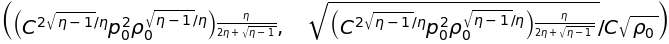

In [23]:
rel_riemann_problem_intersection = sympy.solve([taub_curve, ur_riemann_invariant_conservation],[p,gamma])[1]
rel_riemann_problem_intersection

When calculating the growth factor, one has to take into account the contribution of the pressure to the intertia

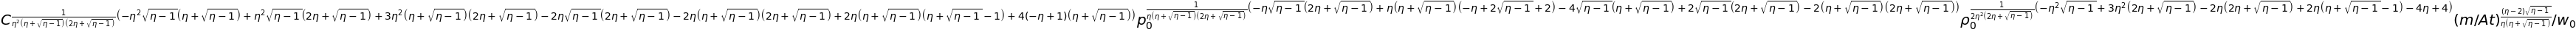

In [24]:
temp = (t/gamma)*(a/w)*(rho*C**2/p)
temp = temp.subs(w,w_0*(rho_0/rho))
temp = temp.subs(rho, rho_0*(p/p_0)**(1/eta))
temp = temp.subs(p,rel_riemann_problem_intersection[1]*(gamma/rel_riemann_problem_intersection[0])**(sympy.sqrt(eta-1)/eta))
temp = temp.subs(a, gamma/t)
temp = temp.subs(gamma, lf_history)
temp = temp.subs(eta,eta2+1)
temp = sympy.expand_power_base(temp, force=True)
temp = temp.simplify()
temp = temp.subs(eta2, eta-1).simplify()
gr_growth_factor = temp
gr_growth_factor

Breakup time

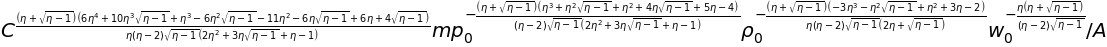

In [25]:
temp = sympy.solve(gr_growth_factor-1,t)[0]
temp = temp.subs(eta, eta2+1)
gr_breakup_time = sympy.expand_power_base(temp, force=True).simplify().subs(eta2, eta-1)
gr_breakup_time

For an equation of state with $\eta=\frac{4}{3}$

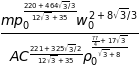

In [28]:
gr_breakup_time.subs(eta,sympy.Rational(4,3)).simplify()

We note that the relativistic Rayleigh Taylor rate is approximately $\sqrt{k a\frac{\rho_2-\rho_1}{\rho_1+\rho_2+p/c^2}}$. As one might expect, the difference with respect to the newtonian rate is the inclusion of the pressure term as part of the inertia (denominator). It does not appear in the driving term (numerator) because it is the same of both sides.